In [105]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import spacy
import re
import string
import sqlite3
from sqlalchemy import create_engine
import psycopg2
import plotly.express as px
import plotly.graph_objects as go
import json

In [106]:
conn = psycopg2.connect(
    dbname="postgres", 
    user="root", 
    password="password1", 
    host="localhost", 
    port="5432"
)

# Define your SQL query
query = 'SELECT * FROM "Issue"'


# Execute the query and load the result into a DataFrame
df = pd.read_sql(query, conn)
conn.close()
# Define the column mapping
column_mapping = {
    "Summary": "summary",
    "Issue key": "issueKey",
    "Issue id": "issueId",
    "Issue Type": "issueType",
    "Status": "status",
    "Project key": "projectKey",
    "Project name": "projectName",
    "Priority": "priority",
    "Resolution": "resolution",
    "Assignee": "assignee",
    "Reporter (Email)": "reporterEmail",
    "Creator (Email)": "creatorEmail",
    "Created": "created",
    "Updated": "updated",
    "Last Viewed": "lastViewed",
    "Resolved": "resolved",
    "Due date": "dueDate",
    "Description": "description",
    "Partner Names": "partnerNames",
    "Custom field (Cause of issue)": "causeOfIssue",
    "Custom field (Record/Transaction ID)": "recordTransactionId",
    "Custom field (Region)": "region",
    "Custom field (Relevant Departments)": "relevantDepartments",
    "Custom field (Relevant Departments).1": "relevantDepartments1",
    "Custom field (Request Category)": "requestCategory",
    "Custom field (Request Type)": "requestType",
    "Custom field (Request language)": "requestLanguage",
    "Custom field (Resolution Action)": "resolutionAction",
    "Satisfaction rating": "satisfactionRating",
    "Custom field (Satisfaction date)": "satisfactionDate",
    "Custom field (Source)": "source",
    "Custom field (Time to first response)": "timeToFirstResponse",
    "Custom field (Time to resolution)": "timeToResolution",
    "Custom field (Work category)": "workCategory",
    "Status Category": "statusCategory",
    "Status Category Changed": "statusCategoryChanged",
    "Custom field ([CHART] Date of First Response)": "dateOfFirstResponse",
    # "comments": "comments"
}
df["comments"] = df["comments"].apply(json.loads)
# Check the type of the first entry in 'comments'
print(len(df.loc[0, 'comments']))
# Rename the columns in the DataFrame
df.rename(columns=column_mapping, inplace=True)


10


/tmp/ipykernel_65181/2476838089.py:14: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [5]:
df.columns

Index(['Summary', 'Issue key', 'Issue id', 'Issue Type', 'Status',
       'Project key', 'Project name', 'Priority', 'Resolution', 'Assignee',
       'Reporter (Email)', 'Creator (Email)', 'Created', 'Updated',
       'Last Viewed', 'Resolved', 'Due date', 'Description', 'Partner Names',
       'Custom field (Cause of issue)', 'Custom field (Record/Transaction ID)',
       'Custom field (Region)', 'Custom field (Relevant Departments)',
       'Custom field (Relevant Departments).1',
       'Custom field (Request Category)', 'Custom field (Request Type)',
       'Custom field (Request language)', 'Custom field (Resolution Action)',
       'Satisfaction rating', 'Custom field (Satisfaction date)',
       'Custom field (Source)', 'Custom field (Time to first response)',
       'Custom field (Time to resolution)', 'Custom field (Work category)',
       'Status Category', 'Status Category Changed',
       'Custom field ([CHART] Date of First Response)', 'comments', 'category',
       'subca

Frequency of tickets over time

<Axes: xlabel='created', ylabel='Count'>

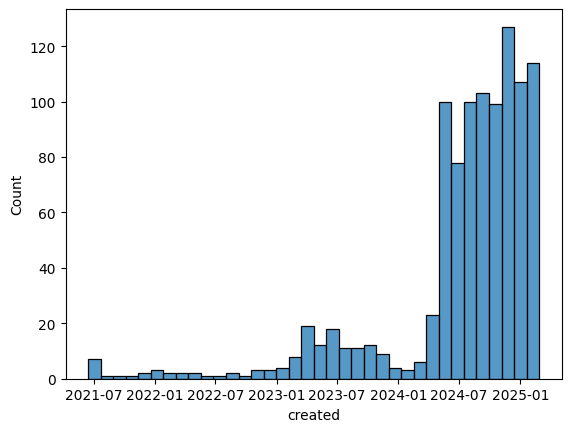

In [24]:
sns.histplot(df, x='created')

Frequency in 2025

/tmp/ipykernel_65181/2257166818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Month'] = df_2024['created'].dt.strftime('%Y-%m')  # Format as 'YYYY-MM'


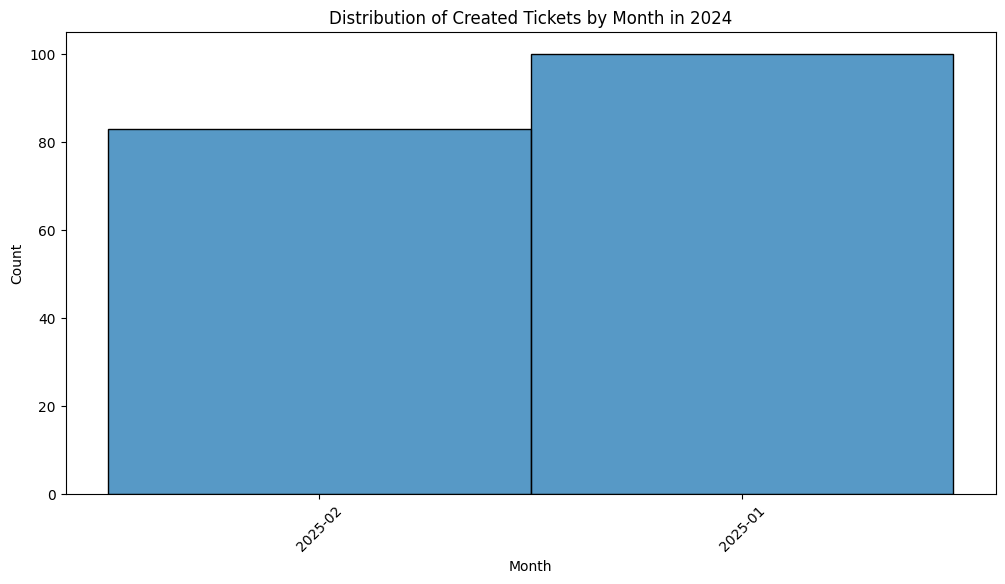

In [25]:
# Filter for the year 2024
df_2024 = df[(df['created'] >= '2025-01-01') ]

# Extract the month for grouping
df_2024['Month'] = df_2024['created'].dt.strftime('%Y-%m')  # Format as 'YYYY-MM'

# Plot histogram grouped by month
plt.figure(figsize=(12, 6))
sns.histplot(df_2024, x='Month', bins=12, discrete=True)

plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Distribution of Created Tickets by Month in 2024")
plt.show()

Frequency in 2024

/tmp/ipykernel_65181/3859010540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Month'] = df_2024['created'].dt.to_period('M').astype(str)


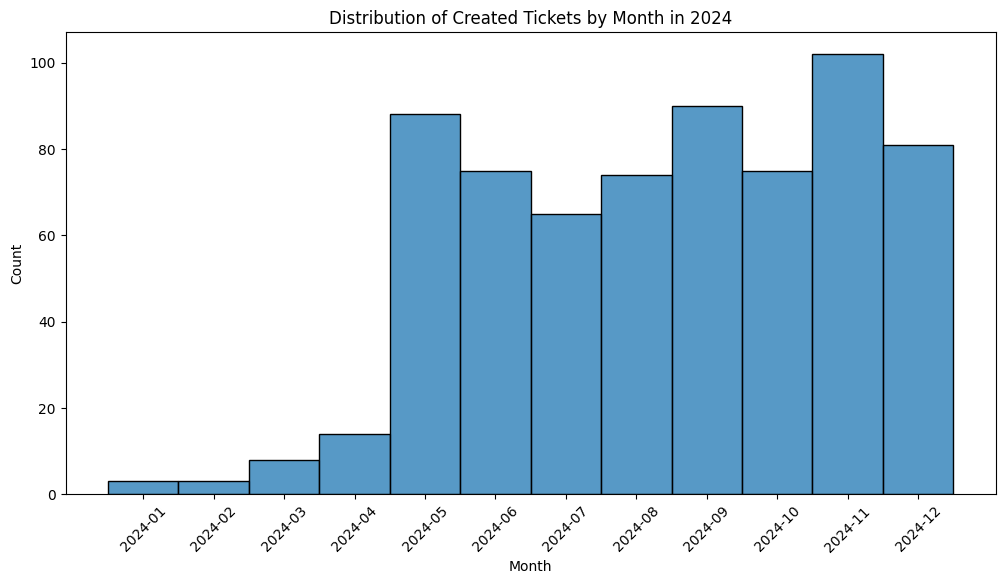

In [26]:
# Filter for the year 2024
df_2024 = df[(df['created'] >= '2024-01-01') & (df['created'] < '2025-01-01')]

# Extract the month as a categorical type with correct order
df_2024['Month'] = df_2024['created'].dt.to_period('M').astype(str)

# Sort by month order
df_2024 = df_2024.sort_values(by='Month')

# Plot histogram grouped by month
plt.figure(figsize=(12, 6))
sns.histplot(df_2024, x='Month', discrete=True)

plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Distribution of Created Tickets by Month in 2024")
plt.show()

2023

/tmp/ipykernel_65181/3645217122.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Month'] = df_2024['created'].dt.to_period('M').astype(str)


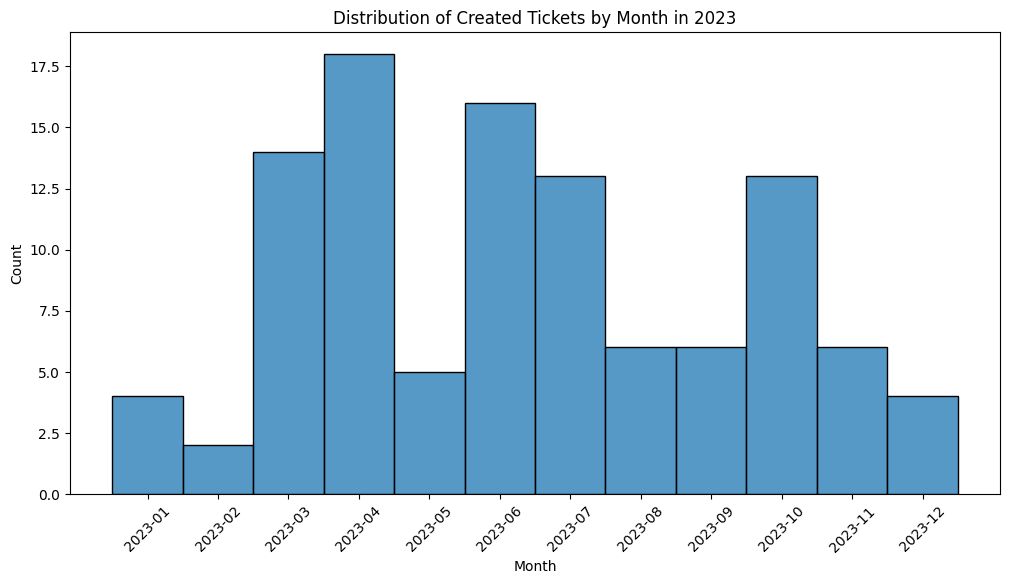

In [27]:
# Filter for the year 2024
df_2024 = df[(df['created'] >= '2023-01-01') & (df['created'] < '2024-01-01')]

# Extract the month as a categorical type with correct order
df_2024['Month'] = df_2024['created'].dt.to_period('M').astype(str)

# Sort by month order
df_2024 = df_2024.sort_values(by='Month')

# Plot histogram grouped by month
plt.figure(figsize=(12, 6))
sns.histplot(df_2024, x='Month', discrete=True)

plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Distribution of Created Tickets by Month in 2023")
plt.show()

Frequency in 2022

/tmp/ipykernel_65181/910853925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Month'] = df_2024['created'].dt.to_period('M').astype(str)


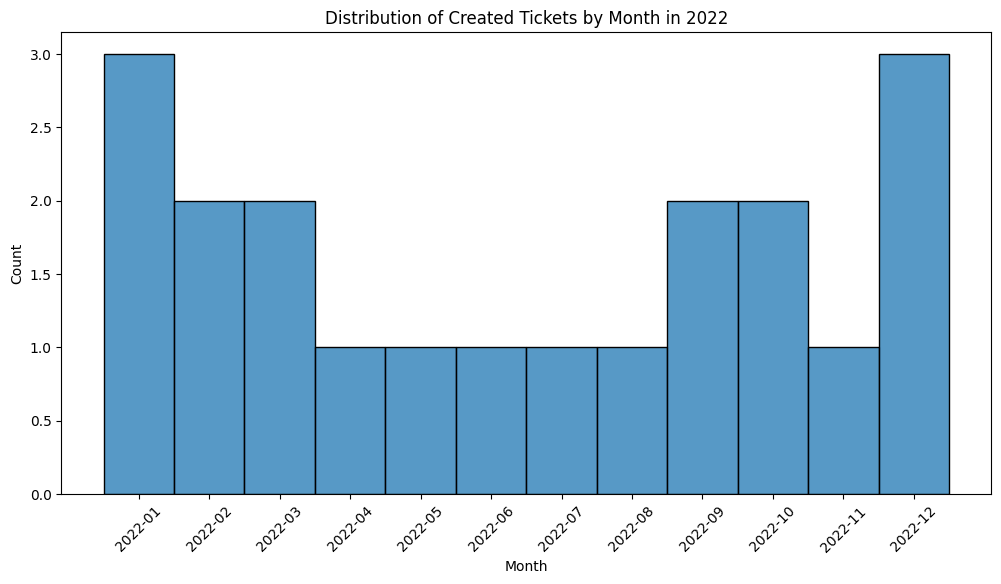

In [28]:
# Filter for the year 2024
df_2024 = df[(df['created'] >= '2022-01-01') & (df['created'] < '2023-01-01')]

# Extract the month as a categorical type with correct order
df_2024['Month'] = df_2024['created'].dt.to_period('M').astype(str)

# Sort by month order
df_2024 = df_2024.sort_values(by='Month')

# Plot histogram grouped by month
plt.figure(figsize=(12, 6))
sns.histplot(df_2024, x='Month', discrete=True)

plt.xticks(rotation=45)  # Rotate labels for better readability
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Distribution of Created Tickets by Month in 2022")
plt.show()

/tmp/ipykernel_65181/496093235.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_65181/496093235.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



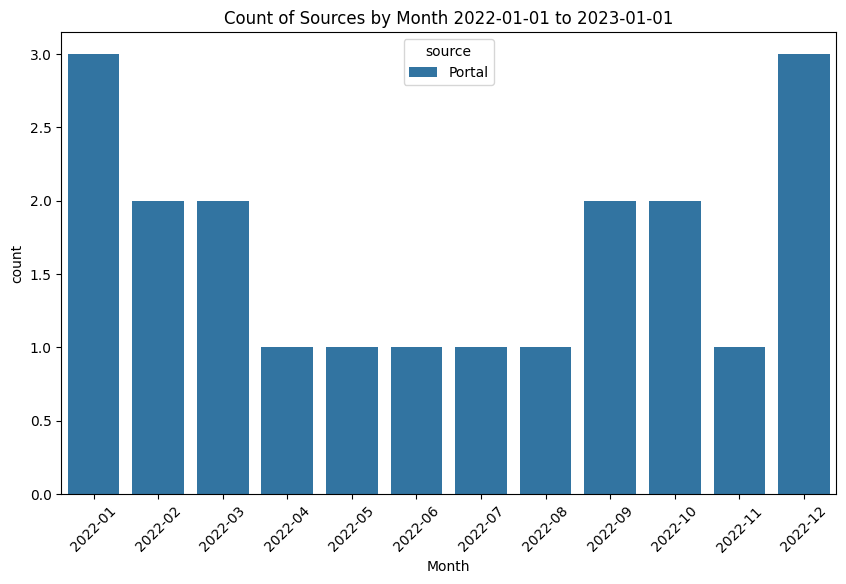

/tmp/ipykernel_65181/496093235.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_65181/496093235.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



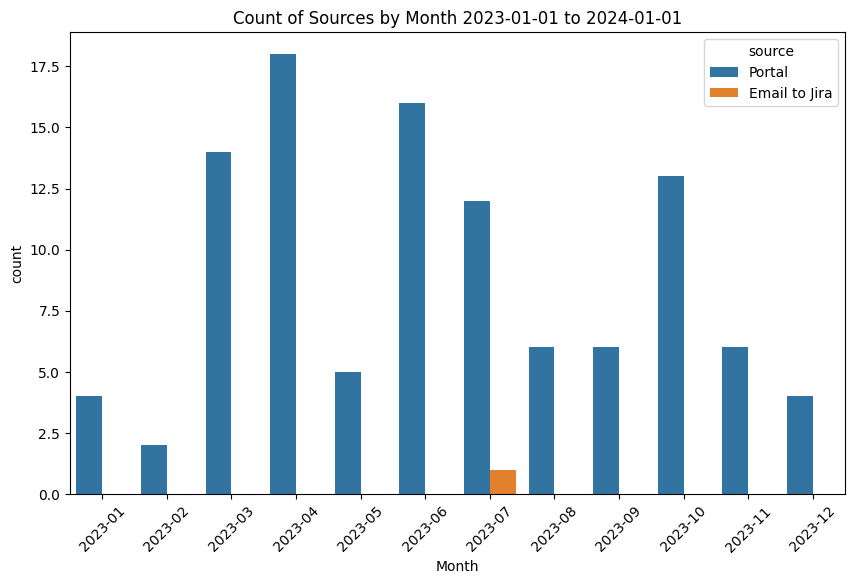

/tmp/ipykernel_65181/496093235.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_65181/496093235.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



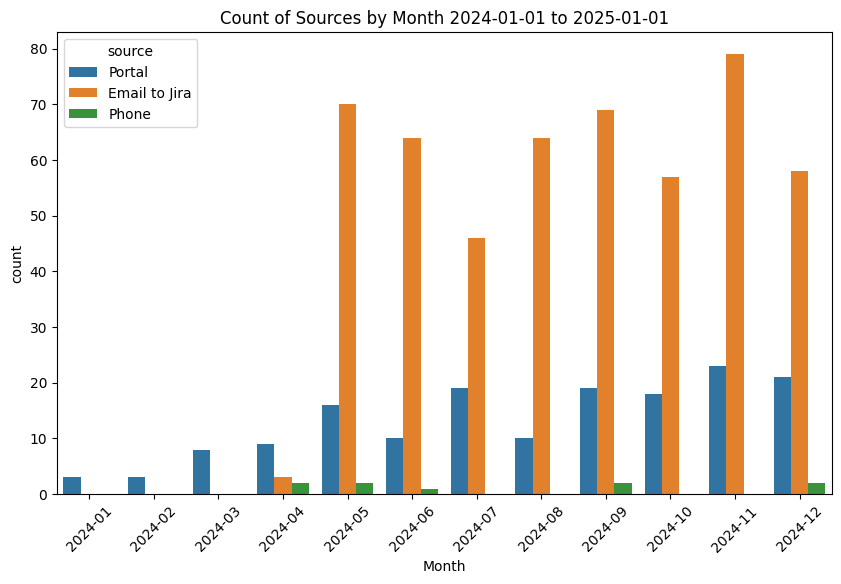

/tmp/ipykernel_65181/496093235.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_65181/496093235.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



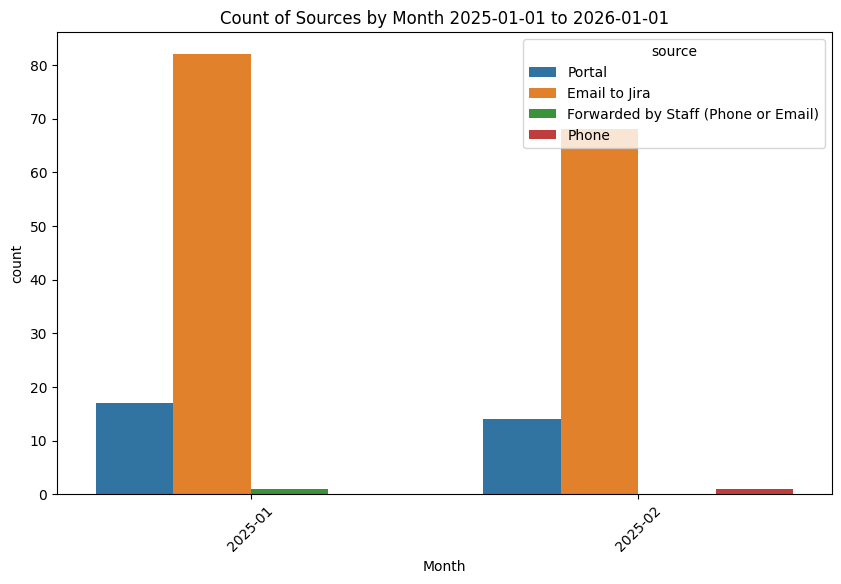

In [68]:
years = ['2022-01-01', '2023-01-01', '2024-01-01', '2025-01-01', '2026-01-01']
for i in range(len(years)-1):
    temp_df = df[(df['created'] > years[i]) & (df['created'] < years[i+ 1])]
    temp_df["Month"] = temp_df["created"].dt.to_period("M").astype(str)  # Format as 'YYYY-MM'

    # Ensure months are in chronological order
    temp_df["Month"] = pd.Categorical(temp_df["Month"], categories=sorted(temp_df["Month"].unique()), ordered=True)

    # Count plot (grouping by month)
    plt.figure(figsize=(10, 6))
    sns.countplot(data=temp_df, x="Month", hue="source")
    plt.title(f'Count of Sources by Month {years[i]} to {years[i+1]}')
    plt.xticks(rotation=45)
    plt.show()
    

Average comment per ticket

In [111]:
count = 0
df['year_month'] = df['created'].dt.to_period('M')  # This gives a Period (e.g., 2025-03)
# Initialize a dictionary to store counts
comments_per_month = {}

# Iterate through each row
for i, row in df.iterrows():
    year_month = row['year_month']
    num_comments = len(row['comments'])  # Adjust to your actual comment column

    if year_month not in comments_per_month:
        comments_per_month[year_month] = []

    comments_per_month[year_month].append(num_comments)

# Now calculate the average number of comments per month for each year-month
avg_comments_per_month = {
    period: sum(comments) / len(comments) for period, comments in comments_per_month.items()
}

# Print out the results
for period, avg_comments in avg_comments_per_month.items():
    print(f"{period}: {avg_comments:.2f} average comments")



2023-07: 4.54 average comments
2024-08: 4.20 average comments
2024-05: 3.76 average comments
2024-06: 4.09 average comments
2023-06: 3.75 average comments
2025-02: 2.57 average comments
2024-11: 3.19 average comments
2024-07: 4.20 average comments
2024-04: 4.79 average comments
2023-03: 3.21 average comments
2024-09: 2.58 average comments
2022-02: 2.50 average comments
2024-12: 2.47 average comments
2025-01: 2.65 average comments
2022-09: 3.00 average comments
2022-10: 4.00 average comments
2022-11: 5.00 average comments
2022-12: 2.67 average comments
2023-01: 3.25 average comments
2023-04: 3.61 average comments
2023-08: 3.17 average comments
2023-09: 3.67 average comments
2024-10: 3.52 average comments
2023-05: 2.80 average comments
2023-11: 5.00 average comments
2023-10: 4.00 average comments
2023-02: 2.50 average comments
2023-12: 2.50 average comments
2024-02: 3.33 average comments
2022-03: 3.50 average comments
2022-05: 4.00 average comments
2021-11: 3.00 average comments
2021-07:

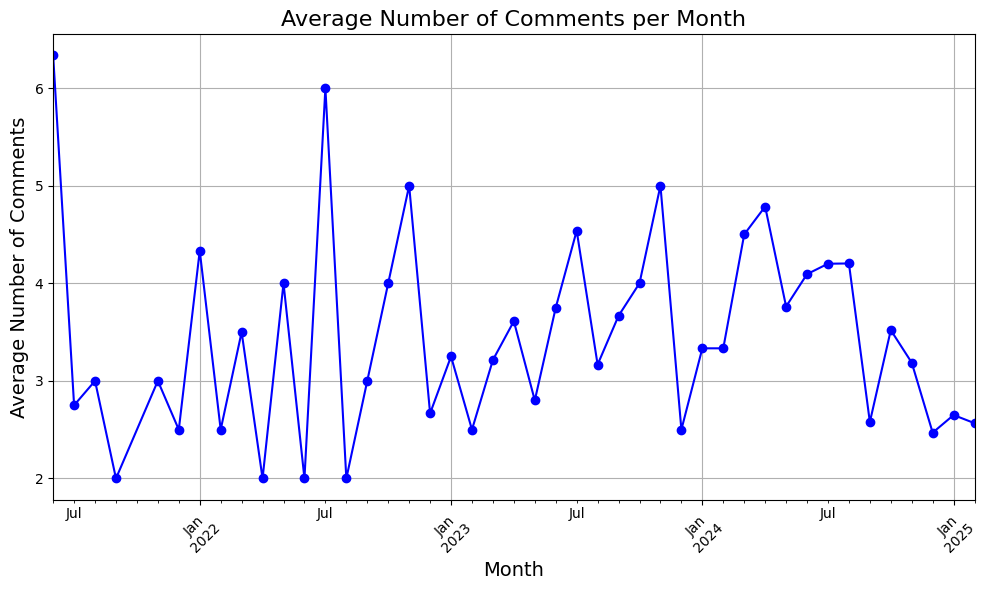

In [113]:
avg_comments_series = pd.Series(avg_comments_per_month).sort_index()

# Plot the average number of comments per month
plt.figure(figsize=(10, 6))
avg_comments_series.plot(kind='line', marker='o', color='b')

# Add title and labels
plt.title('Average Number of Comments per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Number of Comments', fontsize=14)
plt.grid(True)

# Rotate the x-axis labels to make them readable
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()